<img src='./imgs/pinguino1-export.png' width='300' align='right' style='filter: drop-shadow(10px 5px 10px #423f3b)'>

# Análisis univariado
El análisis univariado es un conjunto de técnicas estadísticas para estudiar los datos de una sola variable. Se utilizan para entender mejor el comportamiento de la variable y para identificar patrones, tendencias y relaciones entre los datos. El análisis univariado es un paso importante para entender mejor los datos antes de llevar a cabo un análisis más complejo que involucre más variables.
***

## Importar librerías y cargar datos

In [125]:
# Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import empiricaldist
import janitor

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')


import palmerpenguins

import sklearn.metrics
import statsmodels.api as sm
import statsmodels.stats as ss
import session_info


In [142]:
# cargar datos
datos_procesados = pd.read_csv('./dataset/datos_procesados.csv')
datos_procesados.drop('Unnamed: 0', axis=1, inplace=True)
datos_procesados

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [116]:
# Crear el aspecto general de los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6f69',
    'Gentoo': '#96ceb4',
    'Chinstrap': '#ffeead'
}

## Conteos y proporciones

Los conteos y proporciones se basan en la tabulación.<br>
La tabulación contabiliza la frecuencia de aparición de cada valor único de una variable.<br>
Las proporciones son la relación de correspondencia entre las partes y el todo.

### ¿Qué estadísticas describen el dataset?

#### Todas las variables:

In [117]:
datos_procesados.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


#### Solo las numéricas:

In [118]:
datos_procesados.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### Solo las categóricas:

In [119]:
# Primera forma
datos_procesados.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [121]:
# Segunda forma:
(
    datos_procesados
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#### ¿Cómo visualizar los conteos?

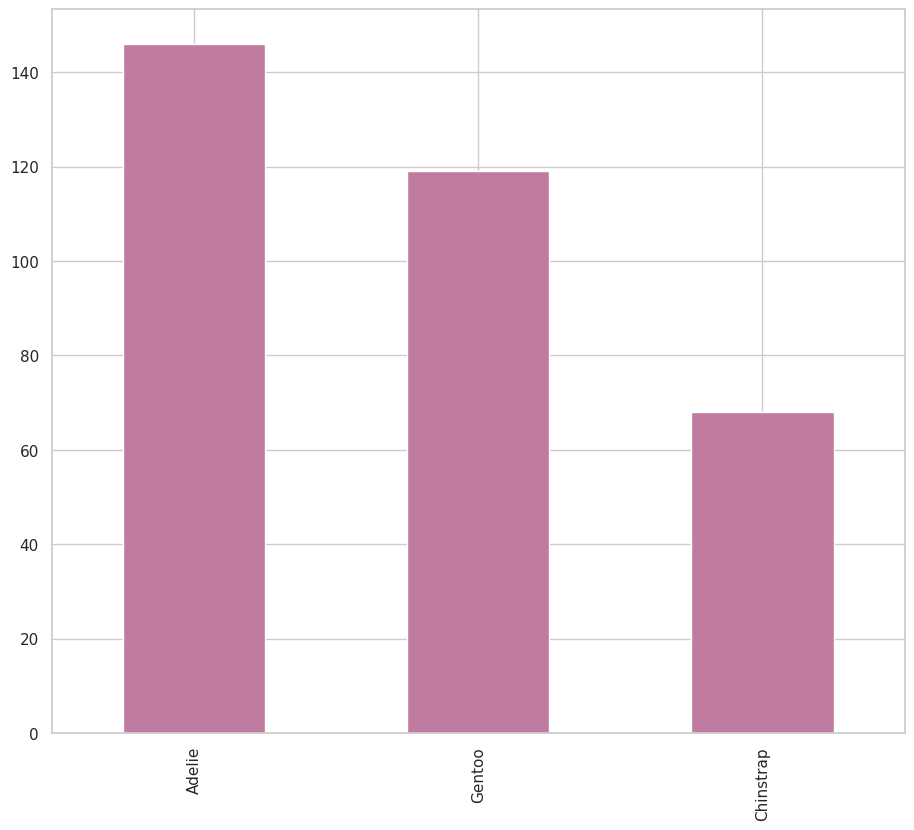

In [173]:
# Con Pandas
(
    datos_procesados
    .species
    .value_counts()
    .plot(
        kind = 'bar',
        color = '#c27ba0'
    )
);

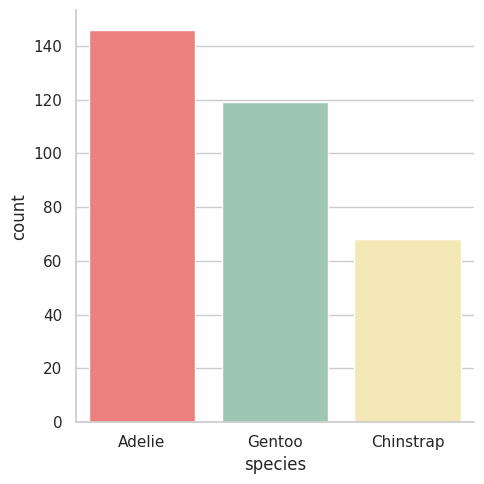

In [123]:
# Con Seaborn
sns.catplot(
    data = datos_procesados,
    x = 'species',
    kind = 'count',
    palette = penguin_color
);

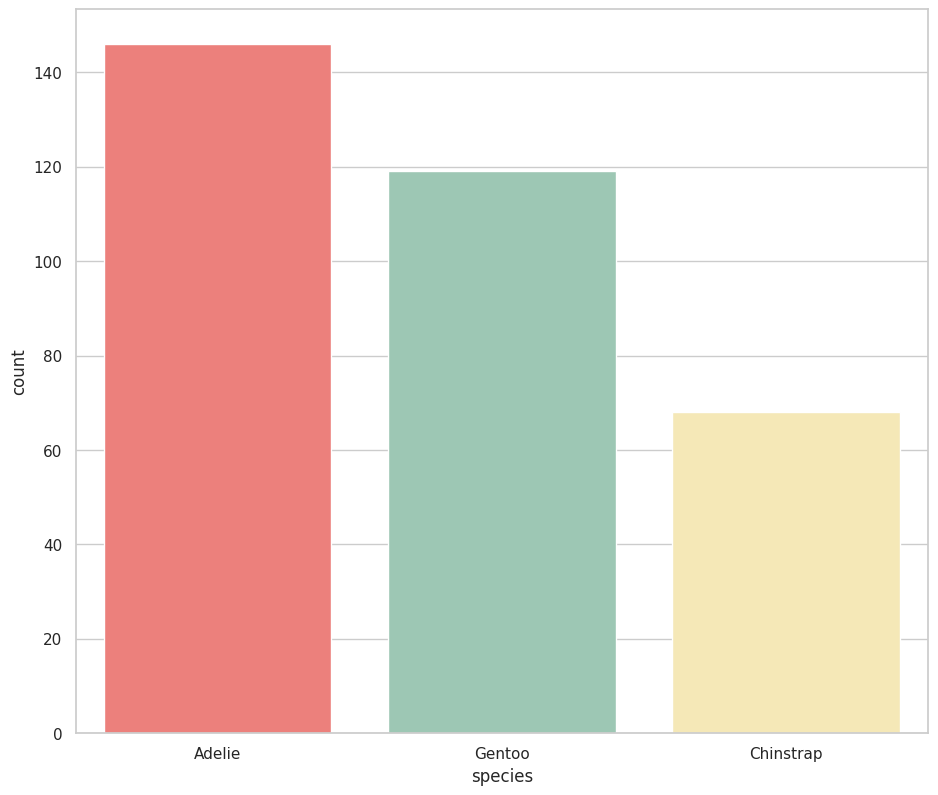

In [124]:
# Otra manera de graficar con Seaborn
(
    datos_procesados
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:
            sns.barplot(
                data = df,
                x = 'species',
                y = 'count',
                palette = penguin_color
            )
    )
);

#### ¿Cómo visualizar las proporciones?

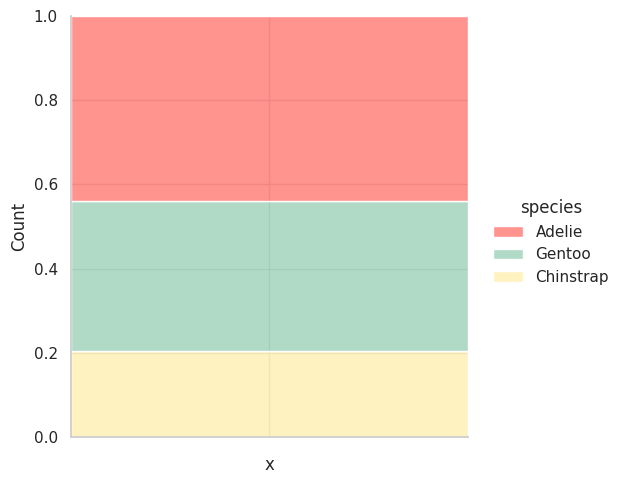

In [126]:
(
    datos_procesados
    .add_column('x', '')
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                x = 'x',
                hue = 'species',
                multiple = 'fill',
                palette = penguin_color
            )
        )
    )
);

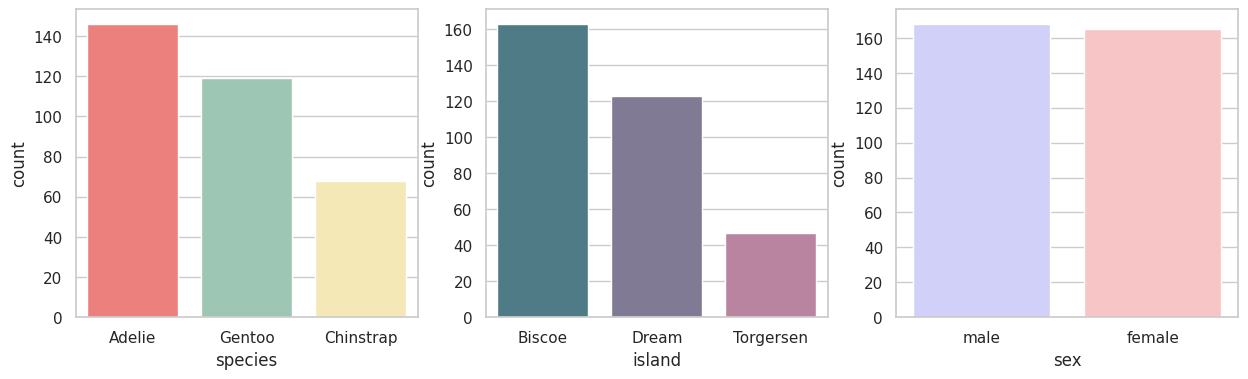

In [147]:
# Explorar el resto de variables categóricas
category_cols = datos_procesados.select_dtypes('object').columns

colores = {
    'Adelie': '#ff6f69',
    'Gentoo': '#96ceb4',
    'Chinstrap': '#ffeead',
    'Biscoe': '#45818e',
    'Dream': '#7e7599',
    'Torgersen': '#c27ba0',
    'female': '#ffbdbd',
    'male': '#c9c9ff'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(category_cols)):
    (
        datos_procesados
        .value_counts(category_cols[i], sort=True)
        .reset_index(name='count')
        .pipe(
            lambda df: (
                sns.barplot(
                    ax = ax[i],
                    data = df,
                    x = category_cols[i],
                    y = 'count',
                    palette = colores
                )
            )
        )   
    );

## Medidas de tendencia central

Las medidas de tendencia central son estadísticas utilizadas para resumir un conjunto de datos. Estas medidas se utilizan para identificar la tendencia central de un conjunto de datos, lo que significa que permiten a las personas encontrar un número que represente la "tendencia general" de los datos.

### Media o Promedio

In [148]:
# Calcular la media de una varible
datos_procesados.bill_depth_mm.mean()

17.164864864864867

La altura promedio de los picos de los pingüinos es de 17 mm.

In [149]:
# Otra forma de conseguir lo mismo con Numpy
np.mean(datos_procesados.bill_depth_mm)

17.164864864864867

In [150]:
# Calcular la media de todas las variables
datos_procesados.mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

### Mediana

In [151]:
# Calcular la mediana de todas las variables
datos_procesados.median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

### Moda

In [152]:
# Calcular la moda de todas las variables
datos_procesados.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [153]:
# Calcular la moda de variables categóricas ('top')
datos_procesados.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## Medidas de dispersión

Las medidas de dispersión son estadísticas que miden la variabilidad de un conjunto de datos. Estas medidas indican cómo los datos se distribuyen alrededor del valor central y la forma en que los datos se están separando entre sí. 

Responder a las siguientes preguntas:

### ¿Cuál es el valor máximo de las variables?

In [155]:
datos_procesados.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [156]:
datos_procesados.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [157]:
datos_procesados.max(numeric_only=True) - datos_procesados.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desviación estándar de las variables?

In [158]:
datos_procesados.std()

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [159]:
#datos_procesados.mean() + datos_procesados.std()
#datos_procesados.mean() - datos_procesados.std()

### ¿Cuál es el rango intercuartílico?

In [160]:
datos_procesados.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [161]:
datos_procesados.quantile(0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [162]:
# Calcular rango intercuartílico
datos_procesados.quantile(0.75) - datos_procesados.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [163]:
# Crear tabla para una mejor visualización
(
    datos_procesados
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


### ¿Cómo puedo visualizar la distribución de una variable?

#### Histograma

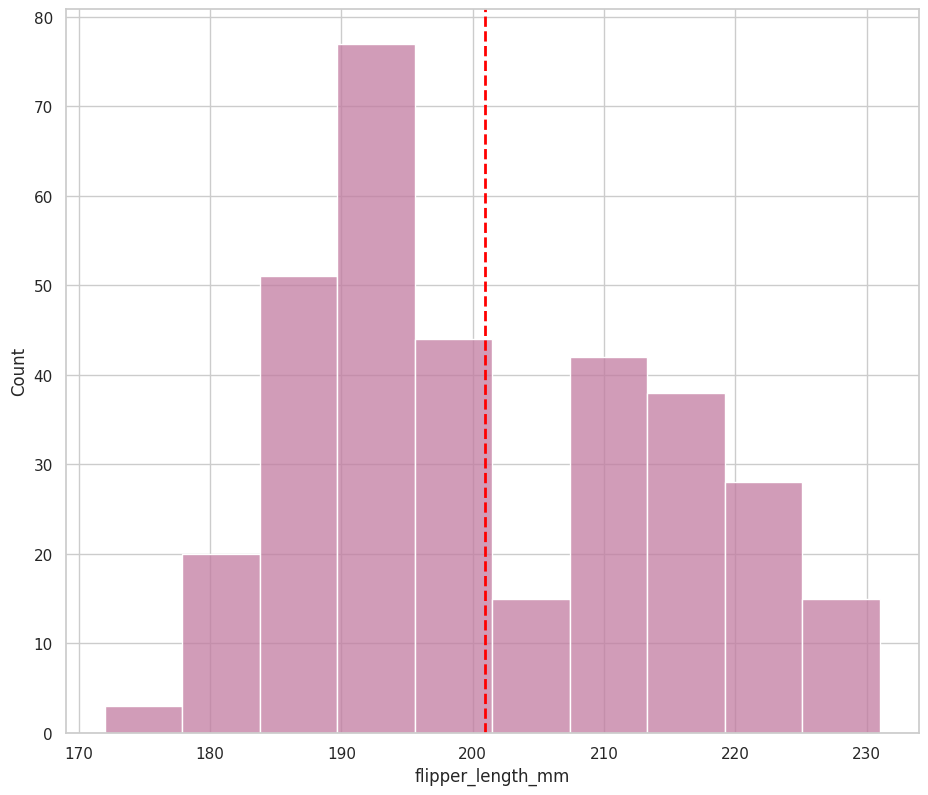

In [164]:
# Histograma de frecuencias de la longitud de las alas de los pingüinos
sns.histplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    color = '#c27ba0'
);

# Para marcar la media
plt.axvline(
    x = datos_procesados.flipper_length_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
);

#### Diagrama de caja / boxplot

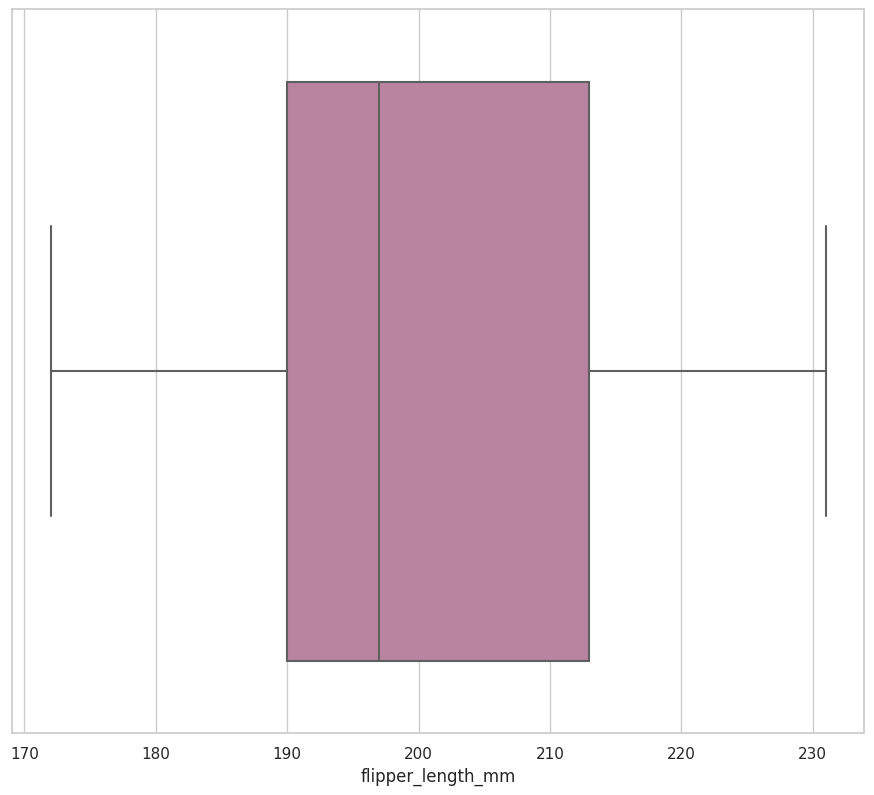

In [167]:
# Para visualizar el rango de los datos sobre las alas de los pingüinos
sns.boxplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    color = '#c27ba0'
);

Se puede ver que los datos están sesgados.

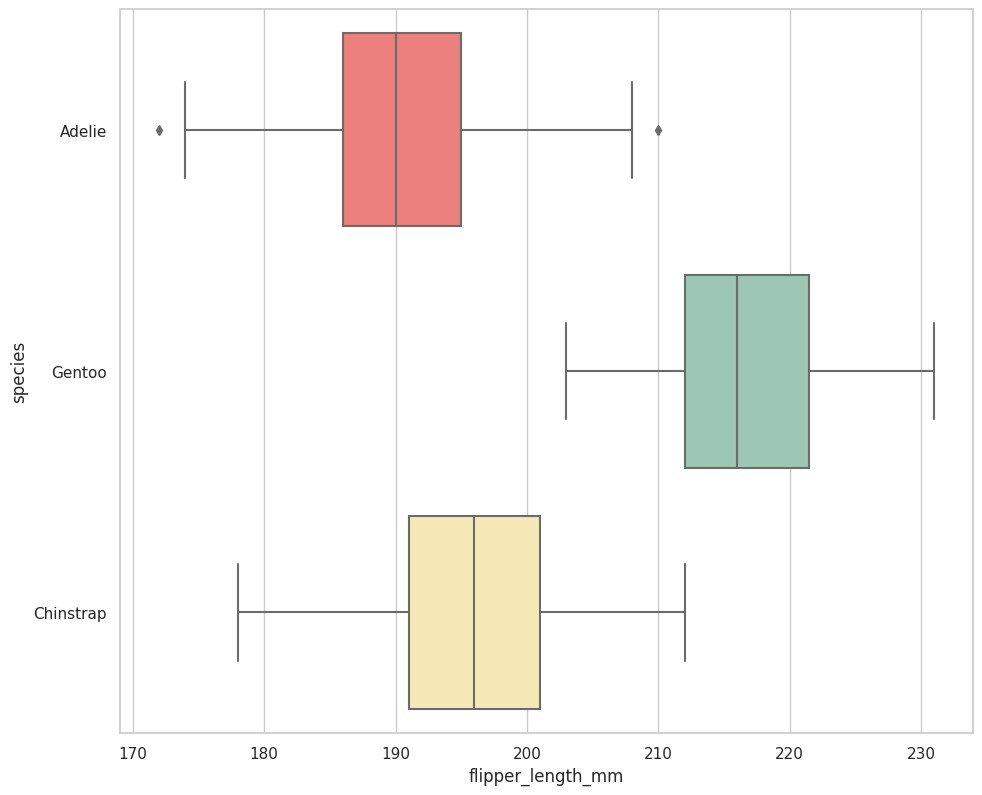

In [170]:
# Graficar longitud de alas por especie
sns.boxplot(
    data= datos_procesados,
    x = 'flipper_length_mm',
    y = 'species',
    palette = penguin_color
);

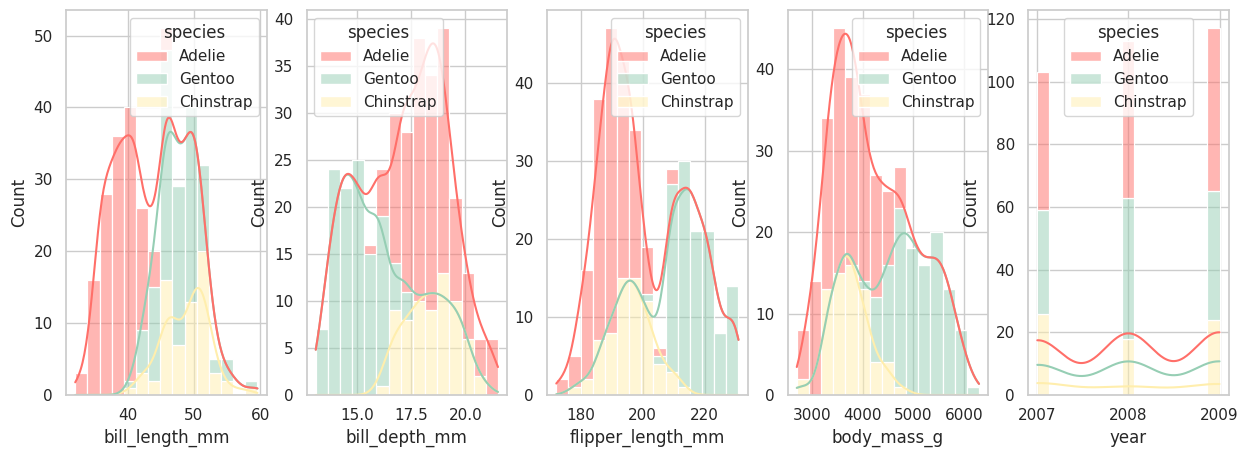

In [171]:
# Graficar la distribucion de las distintas características por especie
numeric_cols = datos_procesados.select_dtypes(include=np.number).columns

fig,ax = plt.subplots(1, len(numeric_cols), figsize=(15, 5))

for i in range(len(numeric_cols)):
    sns.histplot( 
        ax = ax[i],
        data = datos_procesados,
        x = numeric_cols[i],
        multiple = 'stack',
        hue = 'species',
        bins = 15,
        palette = penguin_color,
        kde = True
    );

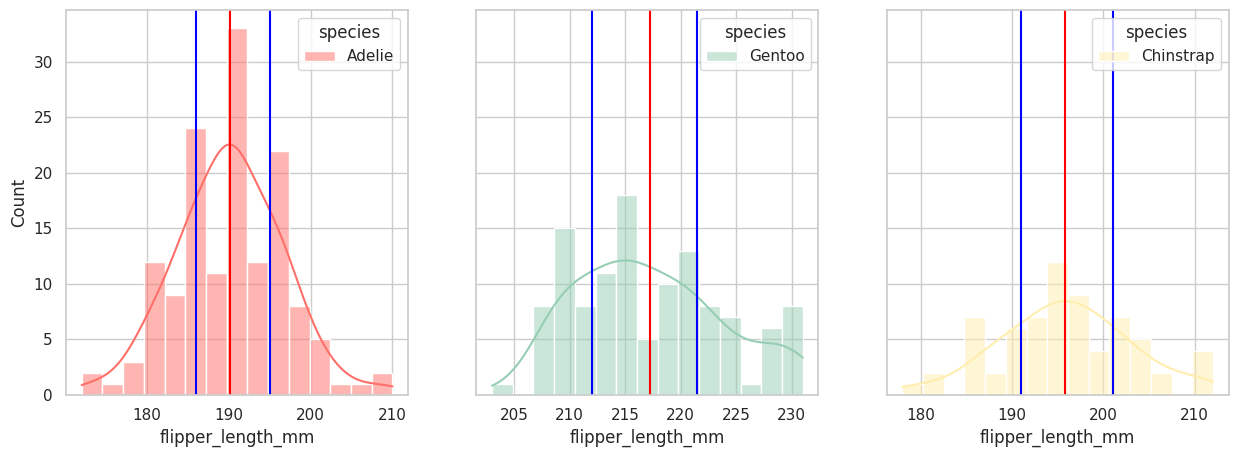

In [172]:
# Gráficar por especie la longitud de las alas con sus respectivas medias y cuantiles
species = datos_procesados.species.unique()

adelie_df = datos_procesados.query("species == 'Adelie'")
gentoo_df = datos_procesados.query("species == 'Gentoo'")
chinstrap_df = datos_procesados.query("species == 'Chinstrap'")

list = [adelie_df,gentoo_df,chinstrap_df]

fig, ax = plt.subplots(1, len(list), figsize=(15, 5), sharey=True)

for i in range(len(list)):
    sns.histplot( 
        ax = ax[i],
        data  =list[i],
        x = 'flipper_length_mm',
        multiple = 'layer',
        hue = 'species',
        bins = 15,
        kde = True,
        palette = penguin_color,
        )
    ax[i].axvline(
        x = list[i]['flipper_length_mm'].mean(),
        color = 'red'
        )
    ax[i].axvline(
        x = list[i]['flipper_length_mm'].quantile(.25),
        color = 'blue'
        )
    ax[i].axvline(
        x = list[i]['flipper_length_mm'].quantile(.75),
        color = 'blue'
        );

## Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado.

#### Utilizando seaborn

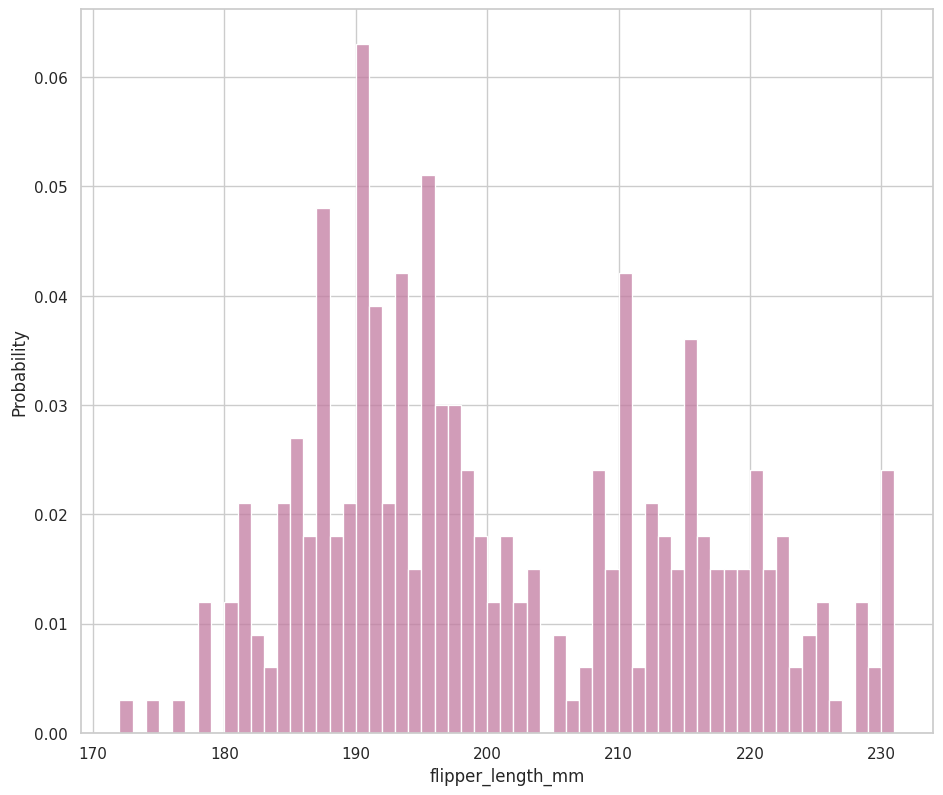

In [174]:
# Graficar probabilidad
sns.histplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    color = '#c27ba0',
    binwidth = 1,
    stat = 'probability'
);

#### Utilizando empiricaldist

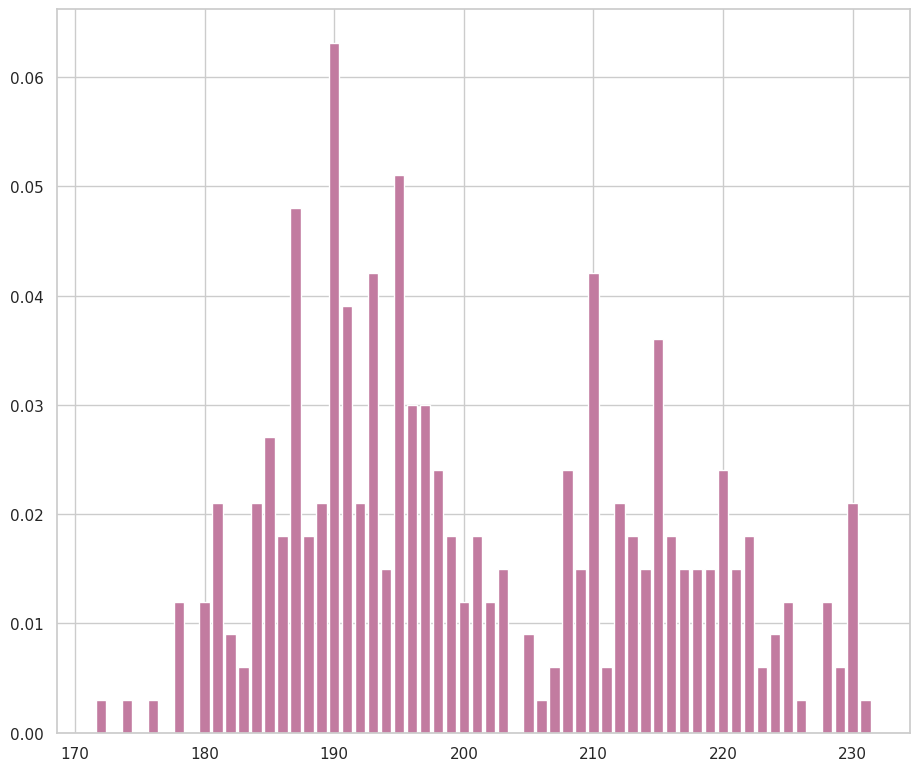

In [176]:
# Graficar probabilidad
pmf_alas_longitud = empiricaldist.Pmf.from_seq(
    datos_procesados.flipper_length_mm,
    normalize = True
)
pmf_alas_longitud.bar(color='#c27ba0')

In [177]:
# Por ejemplo, quiero saber la probabilidad de que un pingüino tenga una longitud de ala de 190 mm (19 centímetros)
pmf_alas_longitud(190)

0.06306306306306306

### Funciones empirícas de probabilidad acumulada (ECDFs)

Nos dice la probabilidad de que una variable sea igual o menor que un valor determinado.

#### Utilizando seaborn

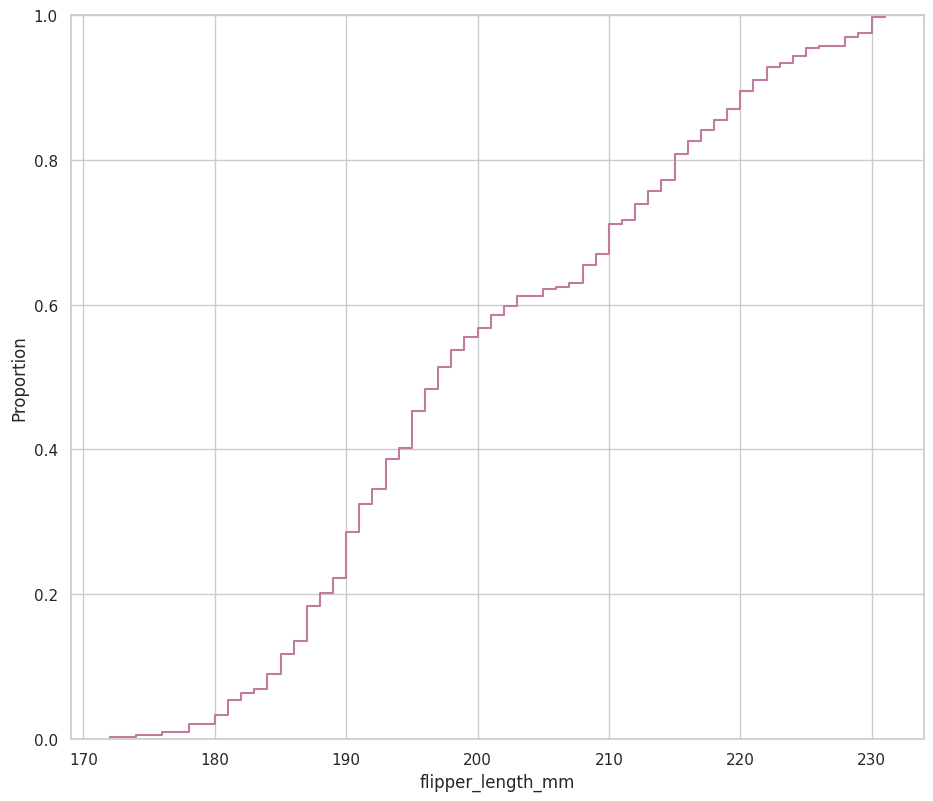

In [178]:
# Graficar la probabilidad acumulada de que un evento suceda
sns.ecdfplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    color = '#c27ba0'
);

#### Utilizando empiricaldist

In [180]:
# Función acumulada de probabilidades
cdf_alas_longitud = empiricaldist.Cdf.from_seq(
    datos_procesados.flipper_length_mm,
    normalize = True
)

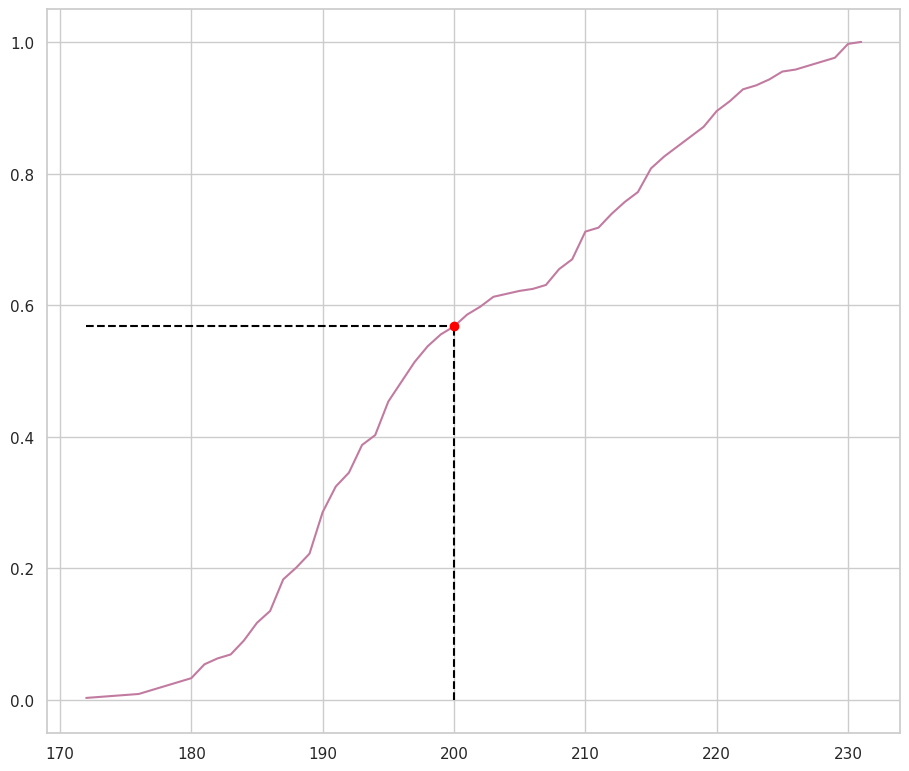

In [181]:
# Graficar
cdf_alas_longitud.plot(color='#c27ba0')

q = 200
p = cdf_alas_longitud.forward(q) # Calcular la probabilidad de que un pinguino tenga 200

plt.vlines(
    x = q,
    ymin = 0,
    ymax = p,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
    y = p,
    xmin = pmf_alas_longitud.qs[0],
    xmax = q,
    color = 'black',
    linestyle = 'dashed'
)

plt.plot(q, p, 'ro');

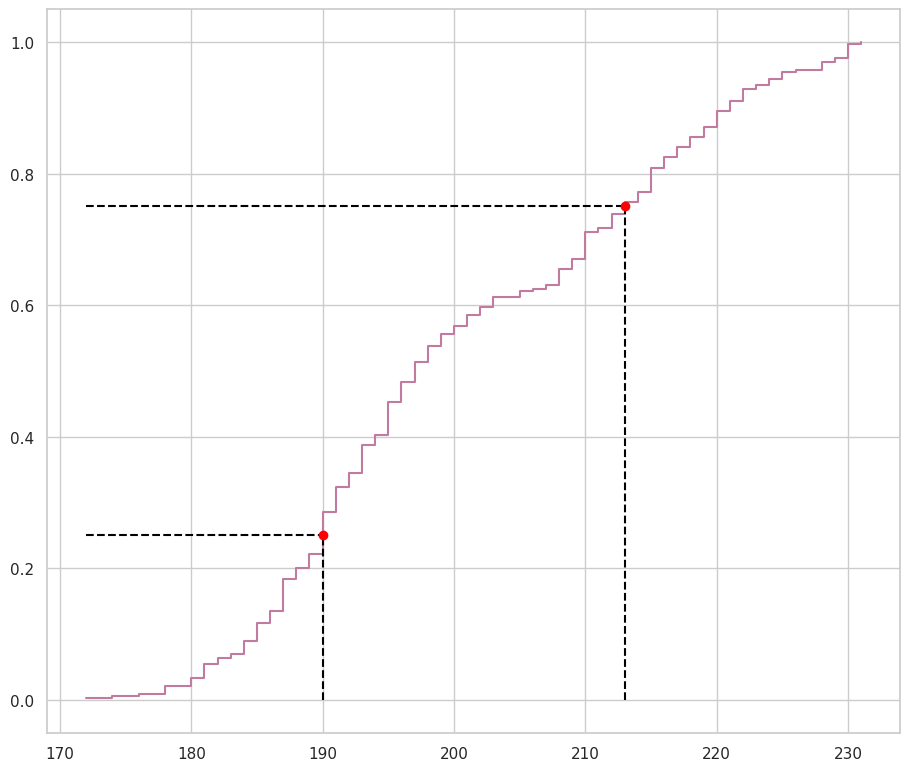

In [183]:
# Hacer más preguntas de una probabilidad específica con empiricaldist
cdf_alas_longitud.step(color='#c27ba0')
p_1 = 8.25
P_2 = 8.75
ps = ( 0.25 , 0.75 )
qs = cdf_alas_longitud.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax = ps,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
   y = ps,
   xmin = pmf_alas_longitud.qs[0],
   xmax = qs,
   color = 'black',
   linestyle = 'dashed'
)

plt.scatter(
   x = qs,
   y = ps,
   color = 'red',
   zorder = 2
);

#### Comparando distribuciones

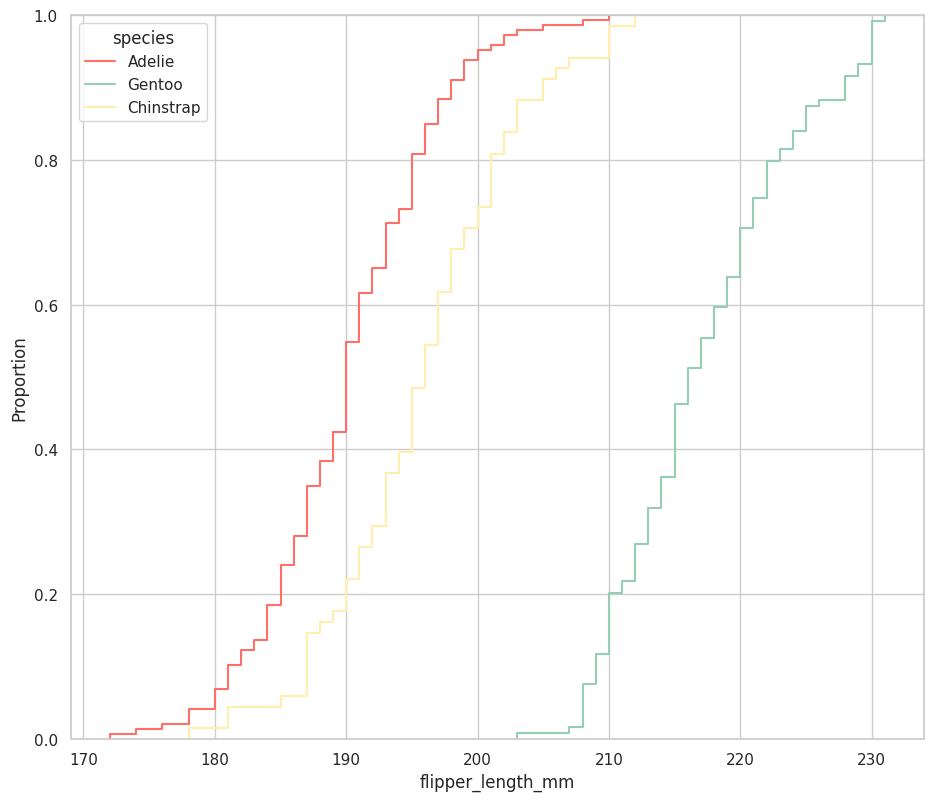

In [184]:
# Graficar la distribución acumulada de probabilidad de cada especie
sns.ecdfplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
);

### Funciones de densidad de probabilidad

Nos dice la probabilidad de que una variable continua tome un valor determinado.

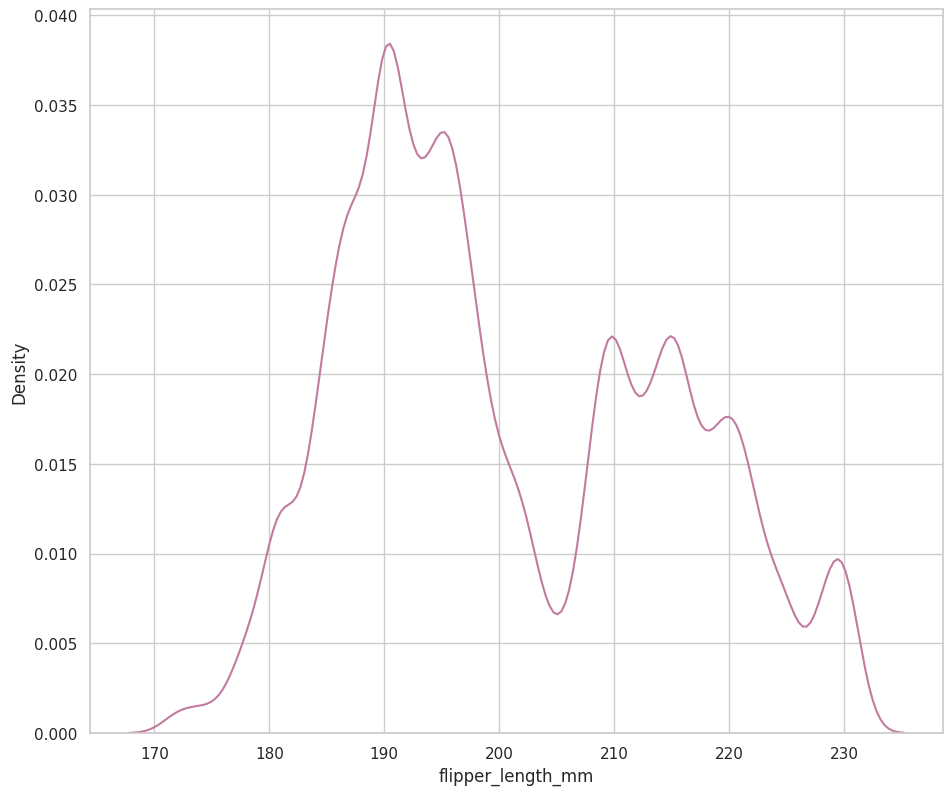

In [185]:
# Graficar
sns.kdeplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    color = '#c27ba0',
    bw_method = 0.1
);

In [186]:
# Guardar en una variable los datos estadísticos del peso de los pingüinos
stats = datos_procesados.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

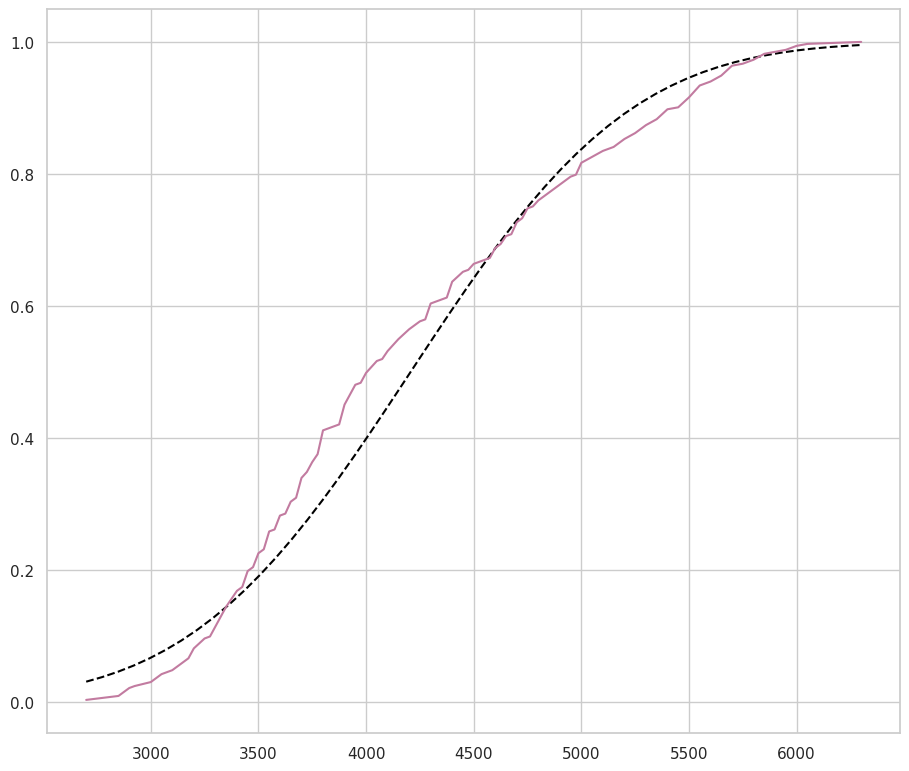

In [187]:
# Generar datos aleatorios y comparar la distribución de datos
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    datos_procesados.body_mass_g,
    normalize = True
).plot(color='#c27ba0');

Los datos no se comportan de una manera normal.

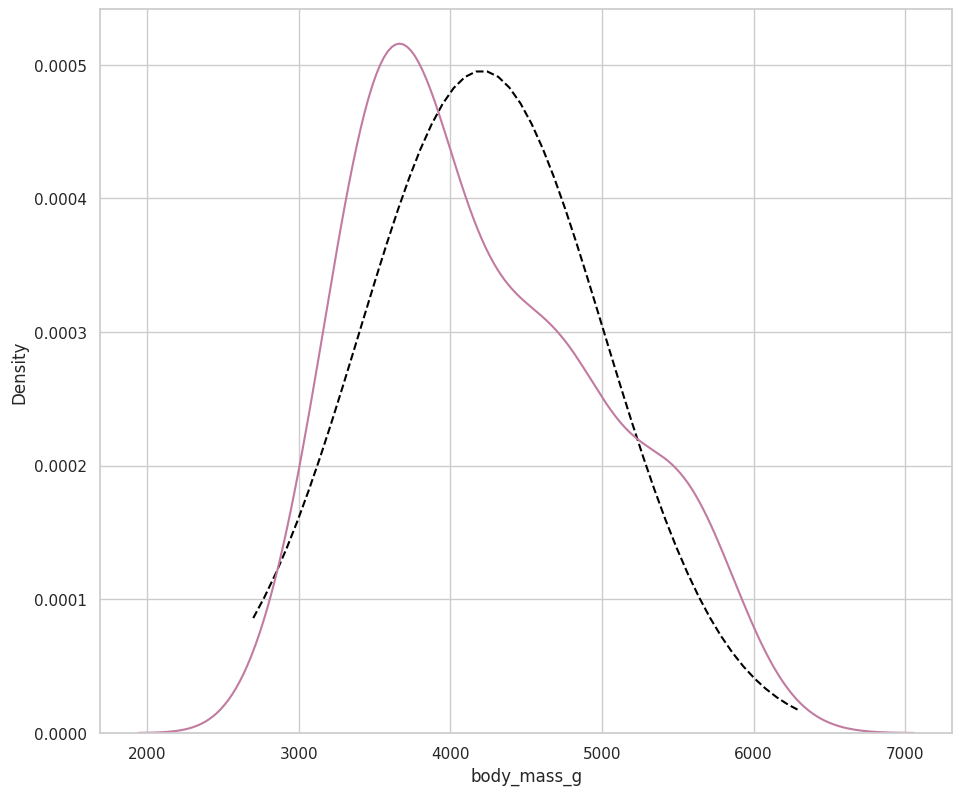

In [188]:
# Otra comparación
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data = datos_procesados,
    x = 'body_mass_g',
    color = '#c27ba0'  
);

La distribución de los datos está sesgada hacia la izquierda. Los datos no siguen una distribución normal.

## Ley de los grandes números y teorema del límite central

### Ley de los grandes números

La ley de los grandes números es una ley matemática que establece que, a medida que el número de ensayos incrementa, la media de los resultados de un experimento aleatorio se acercará al valor esperado de la media. Esta ley se aplica a la probabilidad y la estadística.

Ejemplo:

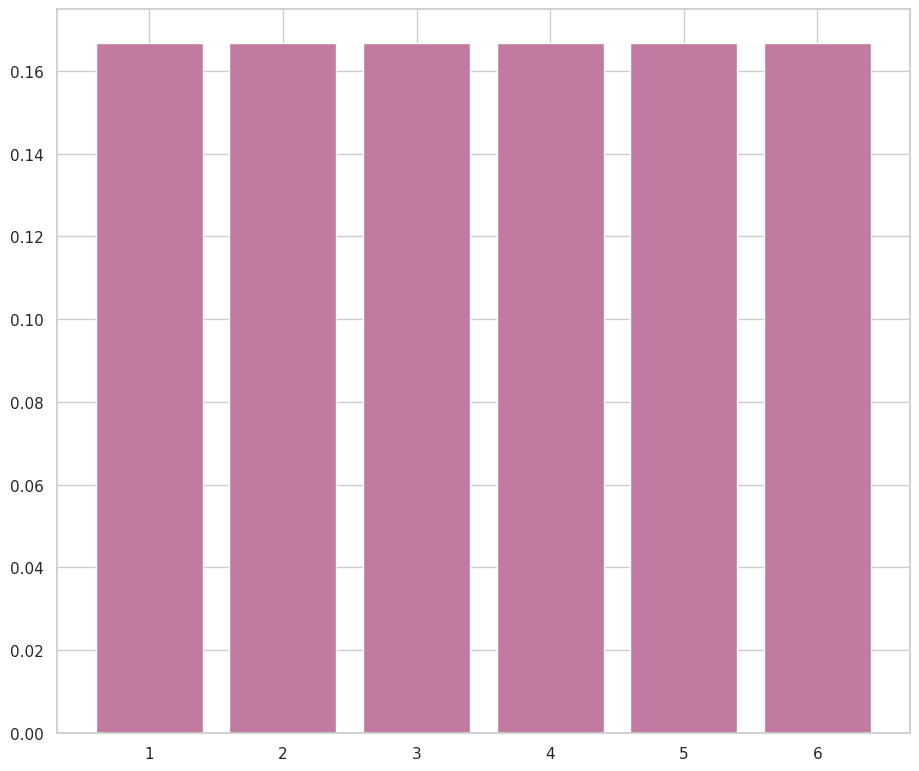

In [190]:
# Representar un dado
dado = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dado.bar(color='#c27ba0')

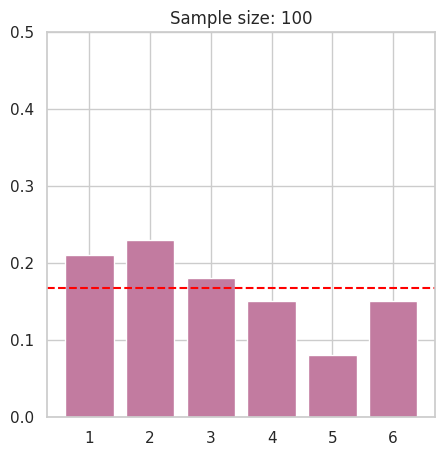

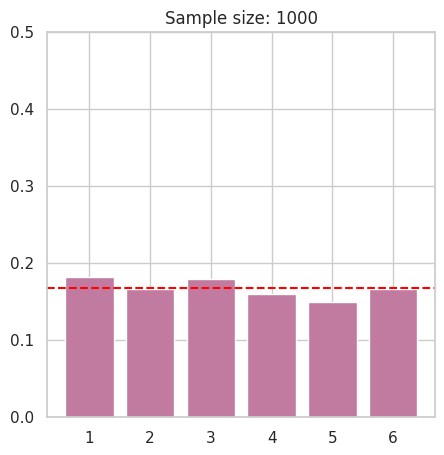

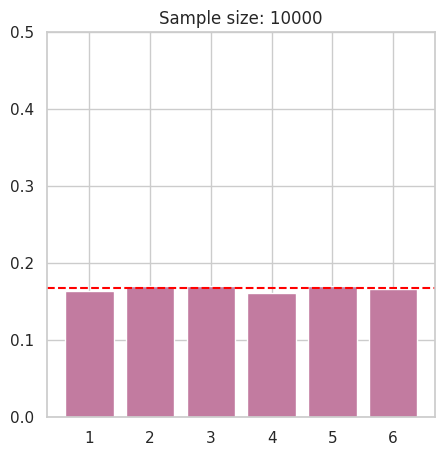

In [194]:
# Simular 1000 ensayos
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dado.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    
    plt.figure(figsize=(5, 5))
    sample_pmf.bar(color='#c27ba0')
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f'Sample size: {sample_size}')

### Teorema del límite central

Esta teoría establece que, a medida que aumenta el tamaño de la muestra, la distribución de los resultados de un experimento tiende a acercarse al promedio de la población. 

In [192]:
datos_procesados.sex.value_counts(normalize=True)

#datos_procesados.sex.value_counts(normalize=True).plot(kind='bar', color='#99aa77');

male      0.504505
female    0.495495
Name: sex, dtype: float64

Esto es una distribución binomial. Pero como esta distribución trabaja con números, hay que convertir el tipo de dato de la variable sex en numérico.

In [193]:
# Convertir
sex_num = datos_procesados.sex.replace(['male', 'female'], [1, 0])

In [195]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# Definir dataframe en blanco
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Asignar nombre a las columnas
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names

for i in range(1, number_samples + 1):
    sex_num_sample = sex_num.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_num_sample

machos_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {machos_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.7343%


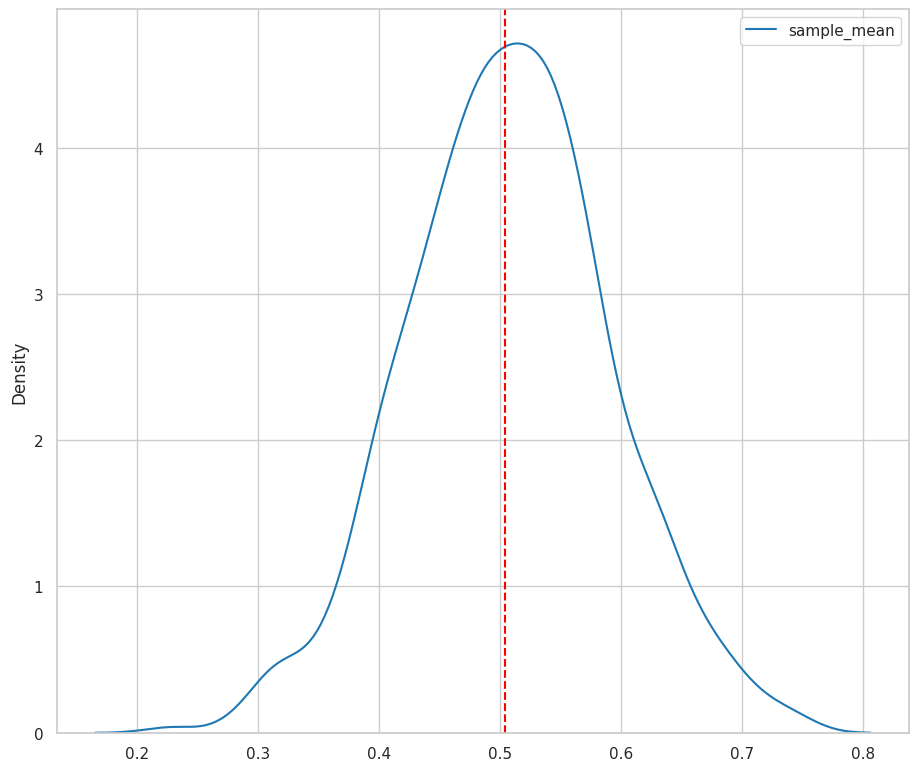

In [209]:
# Corroborar
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(
    data = sample_means_binomial,
    color = '#c27ba0'
)
plt.axvline(x=sex_num.mean(), color='red', linestyle='dashed');

(0.30450450450450445, 0.7045045045045044)

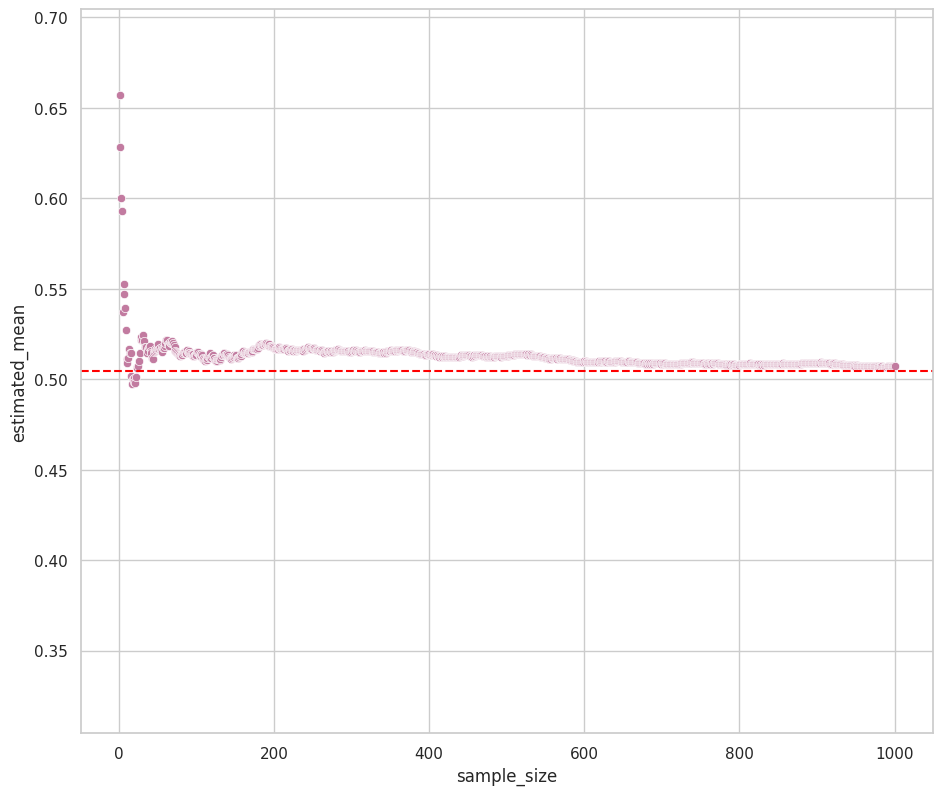

In [210]:
# Otro ejemplo
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

# Visualizar cuál es el resultado de ir incrementando el tamaño de las muestras en la estimación del valor final
sns.scatterplot(
    data = sample_size_experiment,
    x = 'sample_size',
    y = 'estimated_mean',
    color = '#c27ba0'
)

plt.axhline(
    y = sex_num.mean(),
    color = 'red',
    linestyle = 'dashed'
)

plt.ylim([sex_num.mean() - 0.20, sex_num.mean() + 0.20])

***

## Ir al cuaderno de <a href='./2-bivariate-analysis.ipynb'>análisis bivariado</a> para continuar.